# Машинное обучение, DS-поток, осень 2022
## Задание 3.3


**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

* Задача 1 &mdash; 10 баллов;
* Задача 2 &mdash; 30 баллов;
* Задача 3 &mdash; 70 баллов;
* Задача 4 &mdash; 80 баллов.

----

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette='Set2')

from sklearn.base import BaseEstimator

---
## Задача 1.

Выведите итерационную формулу пересчета коэффициентов модели с помощью формулы решения через проксимальный оператор для Ridge-регрессии. Что можно сказать о влиянии параметра регуляризации?

**Решение.**
Имеем задачу регуляризации: $F(\theta) + R(\theta) -> min_{\theta}$\
$F(\theta) = |Y - X\theta|_2^2$\
$R(\theta) = \lambda |\theta|_2^2$

Как известно из лекции оптимальный $\theta$ удовлетовряет равеству: $\theta = Pr_{R}(\theta - \nabla F(\theta))$\
Положим
$x = \theta - \nabla F(\theta)$,\
$g(x, y) = (R(y) + \frac{1}{2}|y - x|_2^2)$

Тогда, задаваясь целью найти $p$:\
$p = Pr_{R}(x) = argmin_{y}g(x, y)$\
Используя утверждение с лекции, перефразируем: при каких $p$ верно $0 \in \partial_y g(x, p)$?\
Для этого распишем субградиент: $\partial_y g(x, p) = (p - x) + \lambda \partial_p (\sum_i {p_i^2}) = (p - x) + 2 \lambda p$\
Тогда $p = \frac{x}{1 + 2\lambda}$

Откуда пересчёт таков: $\theta_{t+1} = \frac{1}{1 + 2\lambda}(\theta - \nabla F(\theta))$ 

**Вывод о влиянии параматра регуляризации:** чем он меньше, тем больше регрессия похожа на простую линейную. Чем больше, тем больше функция обращает внимание на величину коэффициентов.

**Исправлено:** очевидно, что коэффициенты становятся меньше, это ведь цель регуляризации! Речь ведь была как раз о том, что при больших значениях параметра регуляризации функция начинает больше "заботиться" о величине коэффициентов, делая их меньше.

То есть слово величина использована не в смысле "большевизна", а в значении "размер".

---
## Задача 2.

Исследуем Elastic-регрессию.

**1.** Визуализируйте множество, которое ограничивает коэффициенты в Elastic-регрессии.

Elastic-регрессия решает задачу минимизации $|Y - X\theta|_2^2 + \alpha |\theta|_2^2 + \beta |\theta|_1 \rightarrow min_{\theta}$

Положим коэффициенты $\alpha = 0.2, \beta = 1.6$, размерность $d = 2$ и построим границу множества $\alpha (x^2 + y^2) + \beta (|x| + |y|) < 4$

**Исправлено:** теперь кодом.

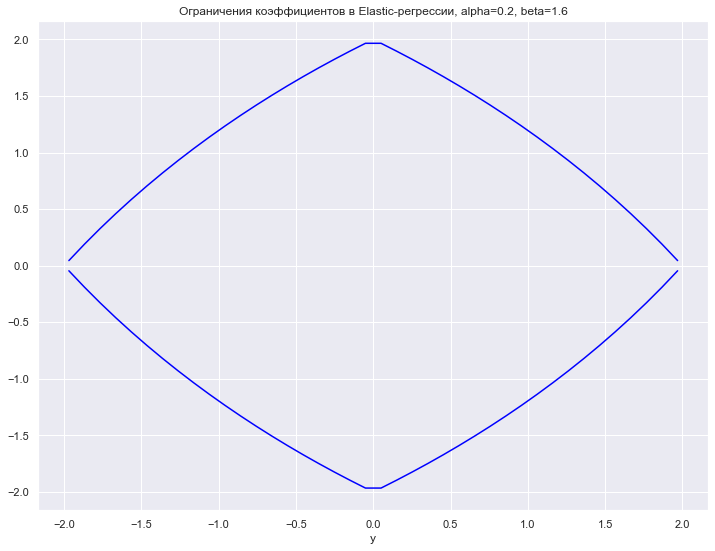

In [18]:
import copy

alpha = 0.2
beta = 1.6

def f(x, pos=True):
    x = copy.deepcopy(x)
    x = np.abs(x)
    discr = beta*beta - 4*x*x*alpha*alpha - 4*beta*alpha*x + 16*alpha
    x[discr < 0] = np.nan
    discr = beta*beta - 4*x*x*alpha*alpha - 4*beta*alpha*x + 16*alpha
    ans = (-beta + np.sqrt(discr)) / (2 * alpha)
    if not pos:
        ans = -ans
    return ans

x = np.linspace(-5, 5, 100)
plt.figure(figsize=(12, 9))
ax = plt.axes()
up = f(x, True)
down = f(x, False)
mask = up >= down
ax.plot(x[mask], up[mask], color="blue")
ax.plot(x[mask], down[mask], color="blue")
ax.set_title(f"Ограничения коэффициентов в Elastic-регрессии, alpha={alpha}, beta={beta}")
ax.set_xlabel("x")
ax.set_xlabel("y");

**Вывод:** получилось то, что и ожидали - что-то среднее между квадратом из ridge-регрессии и кругом из lasso-регрессии. 

**2.** Выведите итерационную формулу пересчета коэффициентов модели с помощью формулы решения через проксимальный оператор.

Какой вы можете видеть эффект при изменении параметра регуляризации и в чем
его отличие от лассо-регрессии?

**Решение.**
Имеем задачу регуляризации: $F(\theta) + R(\theta) -> min_{\theta}$\
$F(\theta) = |Y - X\theta|_2^2$\
$R(\theta) = \alpha |\theta|_2^2 + \beta |\theta|_1$

Как известно из лекции оптимальный $\theta$ удовлетовряет равеству: $\theta = Pr_{R}(\theta - \nabla F(\theta))$\
Положим
$x = \theta - \nabla F(\theta)$,\
$g(x, y) = (R(y) + \frac{1}{2}|y - x|_2^2)$

Тогда, задаваясь целью найти $p$:\
$p = Pr_{R}(x) = argmin_{y}g(x, y)$\
Используя утверждение с лекции, перефразируем: при каких $p$ верно $0 \in \partial_y g(x, p)$?\
Для этого распишем субградиент: $\partial_y g(x, p) = (p - x) + \alpha * 2p + \beta * t(p)$,\
где
\begin{equation*}
t_i(p_i) = 
 \begin{cases}
   -1 &\text{, если $p_i < 0$}\\
   [-1,1] &\text{, если $p_i = 0$}\\
   1 &\text{, если $p_i > 0$}\\
 \end{cases}
\end{equation*}

Откуда пересчёт таков (покоординатно):
\begin{equation*}
\theta_{t+1, i} = 
 \begin{cases}
   \frac{\theta_{t,i} - \frac{\partial F(\theta_t)}{x_i} + \beta}{1 + 2\alpha} &\text{, если $\theta_{t,i} - \frac{\partial F(\theta_t)}{x_i} < - \beta$}\\
   \\
   \frac{\theta_{t,i}- \frac{\partial F(\theta_t)}{x_i} - \beta}{1 + 2\alpha} &\text{, если $\theta_{t,i} - \frac{\partial F(\theta_t)}{x_i} > \beta$}\\
   \\
   0 &\text{, иначе}\\
 \end{cases}
\end{equation*}

**Вывод:** если параметр регуляризации $\alpha$ близок к нулю, то отличие elastic-регрессии от лассо-регрессии незначительно (согласно формуле пересчёта). С увеличением параметра $\alpha$ - параметры модели начинают уменьшаться по норме равномерно (а не сразу зануляться, как в голом лассо).

**3.** Выпишите формулы для градиентного и стохастического спуска

**Решение.**

Рассмотрим $F(\theta) = \|Y - X\theta\|^2 + \alpha |\theta|_2^2 + \beta |\theta|_1$.

$F(\theta) = (Y - X\theta)^T(Y - X\theta) + \alpha\theta^T\theta + \beta |\theta|_1 =$\
$= Y^T Y - Y^T X \theta - \theta^T X^T Y + \theta^T X^T X \theta + \alpha\theta^T\theta + \beta |\theta|_1 =$\
$= Y^T Y - 2 Y^T X \theta + \theta^T X^T X \theta + \theta^T \alpha E \theta + \beta |\theta|_1$
 
$\nabla F(\theta) = -2 X^T Y + 2 X^T X \theta + 2\alpha E\theta + \beta * sign(\theta)$,\
где $sign_i(\theta_i) = sign(\theta_i)$ 

* **Градиентный спуск**\
Выберем $\theta_0$ - некоторое приближение искомой оценки $\widehat{\theta}$.\
Выберем также $\eta \in [10^{-4}, 10^{-1}]$.\
Рассмотрим последовательность $\theta_{t+1} = \theta_t - \eta*\nabla F(\theta_t)$, где $\nabla F(\theta) = -2 X^T Y + 2 X^T X \theta + 2\alpha E\theta + \beta * sign(\theta_t)$\
Устремляя $t\rightarrow\inf$, получим $\theta_t\rightarrow\widehat{\theta}$, где $\widehat{\theta}$ - искомая оценка.

* **Стохастический градиентный спуск. Mini batch версия.**\
В этом случае последовательность будет выглядеть так:\
$\theta_{t+1} = \theta_t - \eta * (\frac{n}{k}(X_I^T X_I \theta_t - X_I^T Y_I) + \alpha\theta_t + \frac{\beta}{2} * sign(\theta_t))$,\
где\
$\quad k$ - гиперпараметр, размер пакета.\
$\quad I = [i_1, ..., i_k], i_j \in \{1,2,...,n\}$, батч - выборка из равномерного распределения.\
$\quad X_I, Y_I$ - соответствующие матрицы со строками с индексами из $I$

---
## Задача 3.

Вам предлагается сравнить свойства линейных регрессионных моделей: обычной и с регуляризациями &mdash; Lasso, Ridge, Elastic Net.  

При выполнении задания воспользуйтесь готовыми реализациями методов в sklearn.

Скачайте данные <a href="https://dasl.datadescription.com/datafile/cost-of-living-2018/?_sfm_cases=539+541">`cost of living 2018`</a>, в которых используйте следующие столбцы:
* `City` &mdash; город, данные для которого приводятся.
* `Cost of Living Index` &mdash; является относительным показателем цен на потребительские товары, включая продукты, рестораны, транспорт и коммунальные услуги. Cost of Living Index не включает расходы на проживание, такие как аренда или ипотека. Если город имеет индекс стоимости жизни 120, это означает, что Numbeo оценивает его на 20% дороже, чем Нью-Йорк.

* `Rent Index` &mdash; это оценка цен на аренду квартир в городе по сравнению с Нью-Йорком. Если индекс арендной платы равен 80, Numbeo оценивает, что цена аренды в этом городе в среднем на 20% меньше, чем цена в Нью-Йорке.

* `Cost of Living Plus Rent Index` &mdash; это оценка цен на потребительские товары, включая арендную плату, по сравнению с Нью-Йорком.

* `Restaurant Price Index` &mdash; сравнение цен на блюда и напитки в ресторанах и барах по сравнению с Нью-Йорк.

* `Local Purchasing Power Index` &mdash; показывает относительную покупательную способность при покупке товаров и услуг в данном городе за среднюю заработную плату в этом городе. Если внутренняя покупательная способность составляет 40, это означает, что жители этого города со средней зарплатой могут позволить себе покупать в среднем на 60% меньше товаров и услуг, чем жители Нью-Йорка со средней зарплатой по Нью-Йорку.

* `Groceries Index` &mdash; это оценка цен на продукты в городе по сравнению с Нью-Йорком. Для расчета этого раздела Number использует веса товаров в разделе "Рынки" для каждого города.

In [20]:
data = pd.read_csv('cost-of-living-2018.txt', sep='\t')
data = data[[
    'Cost of Living Index',
    'Rent Index',
    'Cost of Living Plus Rent Index',
    'Restaurant Price Index',
    'Local Purchasing Power Index',
    'Groceries Index'
]]
data.head()

,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Restaurant Price Index,Local Purchasing Power Index,Groceries Index
0,145.43,110.87,128.76,158.75,112.26,143.47
1,141.25,66.14,105.03,135.76,142.70,149.86
2,134.83,71.70,104.38,129.74,130.96,138.98
3,130.68,49.68,91.61,127.22,139.01,127.54
4,128.03,43.57,87.30,119.48,112.71,132.70


**1.** Задача заключается в построении предсказания `Groceries Index` по известным значениям остальных параметров. Разделите данные на признаки $X$ и таргет $y$.

In [21]:
from sklearn.model_selection import train_test_split
y = data["Groceries Index"]
X = data.drop(labels="Groceries Index", axis="columns")

Разбейте данные на обучающую и тестирующие выборки в соотношении 7:3 с помощью `train_test_split`</a> из sklearn. Далее везде вплоть до сравнения моделей используйте обучающую выборку.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((378, 5), (162, 5), (378,), (162,))

Методы с регуляризацией требуют страндартизации признаков. Поясните, почему это необходимо.

**Ответ:** стандартизация важна, потому что иначе признаки могут иметь разные порядки (а значит и параметры модели будут иметь разные порядки), а значит регуляризация будет работать неправильно, поскольку складывать величины разных единиц измерения некорректно.

Примените стандартизацию к обучающей и тестовой выборкам, используя класс <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler">`StandardScaler`</a>, **обученный на обучающей выборке**.

In [23]:
from sklearn.preprocessing import StandardScaler
import copy

def prepare(data, scaler, fit=False):
    data = copy.deepcopy(data)
    if fit:
        scaler.fit(data)
    return scaler.transform(data)

scaler = StandardScaler()
X_train_copy = copy.deepcopy(X_train)
X_test_copy = copy.deepcopy(X_test)
X_train = prepare(X_train, scaler, fit=True)
X_test = prepare(X_test, scaler)
X_train

array([[-0.6726802 , -0.8070413 , -0.77302571, -0.84752382, -1.48272305],
       [-1.30368617, -1.07321574, -1.2776007 , -1.16301034, -0.81336886],
       [-0.62809298, -0.86884272, -0.77416728, -0.66976835, -1.50500768],
       ...,
       [ 0.21518689,  0.52199523,  0.36569275,  0.2868935 ,  1.40014713],
       [-1.0739651 , -1.15092644, -1.17257604, -1.05156983, -0.91881321],
       [ 0.84958537,  1.11798122,  1.0209553 ,  0.82565344,  1.32296621]])

**2.** Исследуйте зависимость значений коэффициентов от параметра регуляризации `alpha` для Ridge, Lasso, Elastic регрессий. Для Elastic также исследуйте зависимость от параметра `l1_ratio`. Нарисуйте графики, используя код с семинара. Предложите диапазоны значений, где стоило бы искать оптимальные параметры регуляризации.

In [24]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

def draw_track(model, X, y, log_min, log_max, num, title='', figsize=(12, 6)):
    """Данная функция строит график зависимости значений 
    коэффициентов модели от параметра регуляризации.
    
    :param model: модель
    :param X: регрессоры
    :param y: отклик
    :param log_min: десятичный логарифм 
        минимального значения коэффициента регуляризации
    :param log_max: десятичный логарифм 
        максимального значения коэффициента регуляризации
    :param num: количество элементов в сетке для коэффициента регуляризации
    :param title: заголовок графика
    :param figsize: размер полотна
    """
    
    alphas = np.logspace(log_min, log_max, num)   
    coefs = []
    for a in alphas:
        if 'l1_ratio' in model.get_params():
            # равномерно распределим alpha по обоим коэффициентам
            a *= 3/2
            model.set_params(alpha=a)
        else:
            model.set_params(alpha=a)
        model.fit(X, y)
        coefs.append(model.coef_)

    plt.figure(figsize=figsize)
    ax = plt.gca()
#     ax.hlines(0, 10 ** log_min, 10 ** log_max, linewidth=15, alpha=0.15)
    ind = 1
    for coef in np.array(coefs).T:
        label = r'$\theta_{' + str(ind) + '}$'
        ax.plot(alphas, coef, linewidth=2, label=label)
        ind += 1
        
    ax.set_xscale('log')
#     ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
    plt.xlabel('alpha', fontsize=19)
    plt.ylabel('weights', fontsize=19)
    plt.title(title, fontsize=22)
    plt.legend(loc='upper left', fontsize=15)
    plt.axis('tight')
    plt.show()

Зависимость от параметра $\alpha$

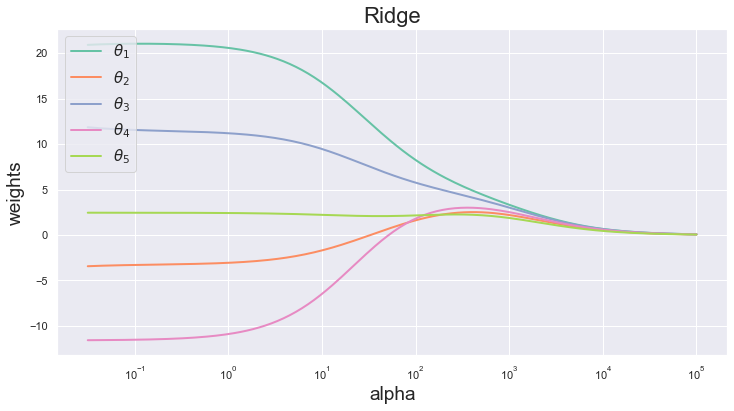

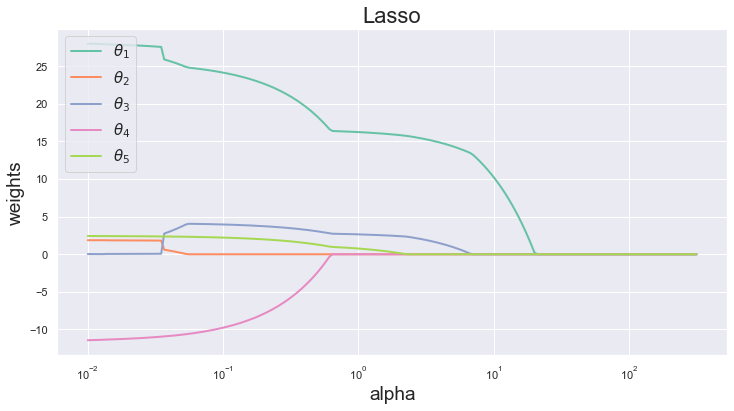

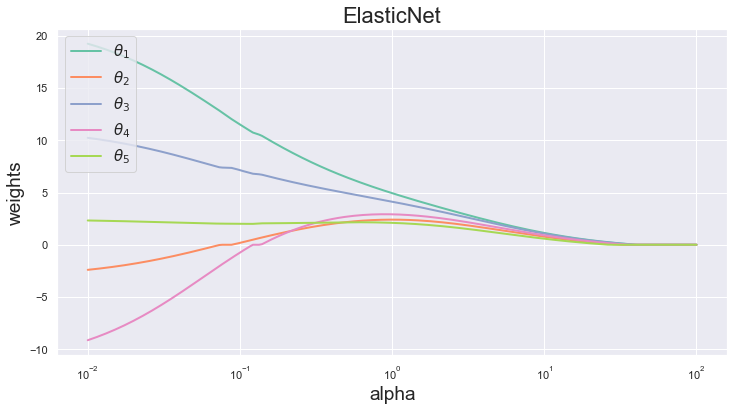

In [25]:
draw_track(Ridge(fit_intercept=False), X_train, y_train, -1.5, 5, 200, 
           title='Ridge')
draw_track(Lasso(fit_intercept=False), X_train, y_train, -2, 2.5, 200, 
           title='Lasso')
draw_track(ElasticNet(fit_intercept=False, l1_ratio=1/3), X_train, y_train, -2, 2, 200, 
           title='ElasticNet')

Визуализируем зависимость коэффициентов elastic-регрессии от l1_ratio.

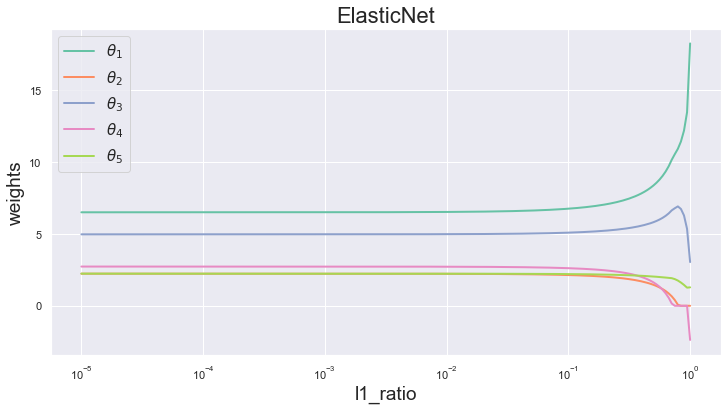

In [26]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

def draw_track_l1_ratio(model, X, y, log_min, log_max, num, title='', figsize=(12, 6)):
    """Данная функция строит график зависимости значений 
    коэффициентов модели от параметра регуляризации.
    
    :param model: модель
    :param X: регрессоры
    :param y: отклик
    :param log_min: десятичный логарифм 
        минимального значения коэффициента регуляризации
    :param log_max: десятичный логарифм 
        максимального значения коэффициента регуляризации
    :param num: количество элементов в сетке для коэффициента регуляризации
    :param title: заголовок графика
    :param figsize: размер полотна
    """
    
    alphas = np.logspace(log_min, log_max, num)   
    coefs = []
    for a in alphas:
        model.set_params(l1_ratio=a)
        model.fit(X, y)
        coefs.append(model.coef_)

    plt.figure(figsize=figsize)
    ax = plt.gca()
#     ax.hlines(0, 10 ** log_min, 10 ** log_max, linewidth=15, alpha=0.15)
    ind = 1
    for coef in np.array(coefs).T:
        label = r'$\theta_{' + str(ind) + '}$'
        ax.plot(alphas, coef, linewidth=2, label=label)
        ind += 1
        
    ax.set_xscale('log')
#     ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
    plt.xlabel('l1_ratio', fontsize=19)
    plt.ylabel('weights', fontsize=19)
    plt.title(title, fontsize=22)
    plt.legend(loc='upper left', fontsize=15)
    plt.axis('tight')
    plt.show()
    
draw_track_l1_ratio(ElasticNet(fit_intercept=False, alpha=0.5), X_train, y_train, -5, 0, 200, 
           title='ElasticNet')

**Предполагаемые отрезки искомых значений параметров:**\
Ridge: $\alpha \in [1; 5*10^4]$\
Lasso: $\alpha \in [10^{-1}; 50]$\
Elastic: $\alpha \in [10^{-1}; 50], \text{l1_ratio} \in [10^{-2}; 1]$

**Исправлено.**

**Вывод о влиянии параметров регуляризации:**
Чем больше alpha, тем меньше коэффициенты. Чем больше l1_ratio, тем больше elastic-регрессия похожа на lasso.

В lasso регрессии коэффициенты, как мы и предполагали, зануляются по-одному, в остальное время слабо меняя величину. В ridge регрессии коэффициенты плавно стремятся к нулю. 

Расчитайте индекс обусловленности для МНК-решения. Можно ли сделать вывод о мультиколлинеарности данных?  
Нарисуйте график зависимость индекса обусловленности от параметра регуляризации для Ridge-регрессии. 

In [27]:
# Через сингулярные числа
import scipy as sp
singular_values = sp.linalg.svdvals(X_train)
print(singular_values.max() / singular_values.min())

# Через собственные значения
eigenvalues, t = np.linalg.eig(X_train.T.dot(X_train))
print(np.sqrt(eigenvalues.max() / eigenvalues.min()))

print("Матрица X мультиколлинеарна")

13000.164520116128
13000.164580826728
Матрица X мультиколлинеарна


**Исправлено:**

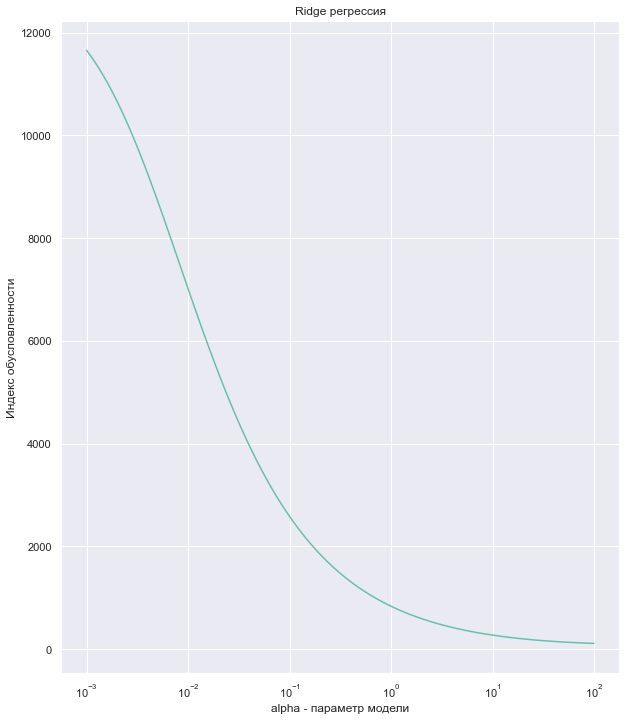

In [29]:
x = np.logspace(-3, 2, 100)
y = np.array([np.sqrt(np.linalg.eig(X_train.T.dot(X_train) + alpha * np.ones(X_train.shape[1]))[0].max() / np.linalg.eig(X_train.T.dot(X_train) + alpha * np.ones(X_train.shape[1]))[0].min()) for alpha in x])
plt.figure(figsize=(10, 12))
ax = plt.axes()
ax.set_xscale('log')
ax.set_xlabel("alpha - параметр модели")
ax.set_ylabel("Индекс обусловленности")
ax.set_title("Ridge регрессия")
ax.plot(x, y);

**Вывод:** данные мультиколлинеарны, поскольку индекс обусловленности значительно больше 30.

**3.** На обучающей выборке с помощью поиска по сетке определите наилучшие параметры для Ridge, Lasso, Elastic моделей. В качестве метрики качества используйте среднеквадратичную ошибку (MSE).

*Замечание.* Не забудьте, что при стандартизации была использована вся обучающая выборка, а внутри кросс-валидации на каждой итерации рассматривается своя валидационная выборка, которая не должна стандартизироваться по данным, посчитанным частично на ней самой. Вам может помочь [`Pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html). Используйте его в качестве аргумента model

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.pipeline import Pipeline

settings = [
    (Ridge, {'regr__fit_intercept': [False, True], 'regr__alpha': np.logspace(-1, 2, 100)}),
    (Lasso, {'regr__fit_intercept': [False, True], 'regr__alpha': np.logspace(-1, 2, 100)}),
    (ElasticNet, {'regr__fit_intercept': [False, True], 
                  'regr__alpha': np.logspace(-1, 2, 20), 
                  'regr__l1_ratio': np.logspace(-1, 0, 20)}
    )
]

best_estimators = []

for model_class, dct in settings:
    ss = ShuffleSplit(n_splits=10, test_size=0.25, random_state=0)
    gs = GridSearchCV(
        estimator = Pipeline([("scaler", StandardScaler()), ("regr", model_class())]),
        param_grid=dct,
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        cv=ss,
        error_score='raise'
    )
    gs.fit(X_train_copy, y_train)
    best_estimators += [(model_class.__name__, gs.best_estimator_)]
    print(model_class.__name__, "is ready")

Ridge is ready
Lasso is ready
ElasticNet is ready


На тестовой части данных сравните качество моделей с оптимальными параметрами. Какая модель дала лучший результат?

In [76]:
from sklearn.metrics import mean_squared_error

for model_class, model in best_estimators:
    print(f"Model name: {model_class}")
    print(f"params: {[(x, y) for x, y in model.get_params().items() if x.startswith('regr__')]}")
    print(f"MSE score: {mean_squared_error(y_test, model.predict(X_test_copy))}")
    print()

Model name: Ridge
params: [('regr__alpha', 0.1), ('regr__copy_X', True), ('regr__fit_intercept', True), ('regr__max_iter', None), ('regr__normalize', 'deprecated'), ('regr__positive', False), ('regr__random_state', None), ('regr__solver', 'auto'), ('regr__tol', 0.001)]
MSE score: 33.501142030039965

Model name: Lasso
params: [('regr__alpha', 0.1), ('regr__copy_X', True), ('regr__fit_intercept', True), ('regr__max_iter', 1000), ('regr__normalize', 'deprecated'), ('regr__positive', False), ('regr__precompute', False), ('regr__random_state', None), ('regr__selection', 'cyclic'), ('regr__tol', 0.0001), ('regr__warm_start', False)]
MSE score: 34.1458199953042

Model name: ElasticNet
params: [('regr__alpha', 0.1), ('regr__copy_X', True), ('regr__fit_intercept', True), ('regr__l1_ratio', 1.0), ('regr__max_iter', 1000), ('regr__normalize', 'deprecated'), ('regr__positive', False), ('regr__precompute', False), ('regr__random_state', None), ('regr__selection', 'cyclic'), ('regr__tol', 0.0001), (

Наилучший результат выдала модель Ridge-регрессии, с наименьшим возможным параматром регуляризации.

**4.** Сделайте общий вывод по задаче.

**Вывод:** 
- Если матрица признаков мультиколлинеарна (напр. индекс обусловленности большой) - нельзя обойтись МНК, ибо переобучение
- В таком случае используем регуляризацию (необходима стандартизация)
- Необходимо упростить модель (занулить влияние некоторых признаков) - следует использовать lasso
- Более сложная модель - следует использовать Ridge или ElasticNet (которая тоже иногда зануляет признаки)
- Валидационная выборка должна предобрабатываться по данным из обучающей (в т.ч. при кросс-валидации следует использовать pipeline)

## Задача 4.

В этой задаче вам предлагается реализовать регрессию Хьюбера, а также применить ее к данным с выбросами. Для начала реализуйте класс по шаблону снизу. Обратите внимание, что класс `HuberRegression` &mdash; наследник класса `BaseEstimator`, это с легкостью позволит использовать наш класс, например, в `GridSearchCV`.

**1.** Задача оптимизации для регрессии Хьбера выглядит следующим образом:
$$\large{\sum_{i=1}^n R(Y_i - X_i^T\theta) \rightarrow \min_\theta},$$
где $R(x) = \frac{x^2}{2} I\{|x| <= c\} + c (|x| - \frac{c}{2})I\{|x| > c\},$ &mdash; функция потерь Хьюбера.

Выпишите формулы для градиентного и стохастического градиентного спусков. В чем польза такой функции потерь?

Рассмотрим $F(\theta) = \sum_{i=1}^n R(Y_i - X_i^T\theta)$.

$F(\theta) = \frac{1}{2}(Y_I - X_I\theta)^T(Y_I - X_I\theta) + c * sign(Y_J - X_J\theta)^T * (Y_J - X_J\theta) - \frac{c^2}{2}=$\
$= \frac{1}{2} (Y_I^T Y_I - 2 Y_I^T X_I \theta + \theta^T X_I^T X_I \theta) + c * sign(Y_J - X_J\theta)^T * (Y_J - X_J\theta) - \frac{c^2}{2}$ 
 
где $X_I, Y_I, X_J, Y_J$ - матрицы со строками из множеств $I$ и $J$ соотвтетственно.\
$I$ - множество таких $i$, что $|Y_i - X_i^T \theta| <= c$\
$J = \{1, 2, .., n\} \text{\\} I$
 
$\nabla F(\theta) = -X_I^T Y_I + X_I^T X_I \theta - c * X_J^T * sign(Y_J - X_J\theta) $,\
где $sign_i(x_i) = sign(x_i)$ 

* **Градиентный спуск**\
Выберем $\theta_0$ - некоторое приближение искомой оценки $\widehat{\theta}$.\
Выберем также $\eta \in [10^{-4}, 10^{-1}]$.\
Рассмотрим последовательность $\theta_{t+1} = \theta_t - \eta*\nabla F(\theta_t)$, где $\nabla F(\theta) = -X_I^T Y_I + X_I^T X_I \theta - c * X_J^T * sign(Y_J - X_J\theta)$\
Устремляя $t\rightarrow\inf$, получим $\theta_t\rightarrow\widehat{\theta}$, где $\widehat{\theta}$ - искомая оценка.

* **Стохастический градиентный спуск. Mini batch версия.**\
В этом случае последовательность будет выглядеть так:\
$\theta_{t+1} = \theta_t - \eta * (\frac{n}{k}(-X_I^T Y_I + X_I^T X_I \theta - c * X_J^T * sign(Y_J - X_J\theta)))$,\
где\
$\quad k$ - гиперпараметр, размер пакета.\
$\quad I, J \in K = [i_1, ..., i_k], i_j \in \{1,2,...,n\}$, батч - выборка из равномерного распределения.\
$\quad X_I, Y_I$ - соответствующие матрицы со строками с индексами из $I$

**Польза функции потерь:** менее чувствительна к выбросам, чем квадратичная, поскольку для них выделен случай |x| > c 

**2.** Реализуем теперь класс

In [30]:
from sklearn.base import BaseEstimator

class HuberRegression(BaseEstimator):
    '''
    Класс, реализующий линейную регрессию, используя функцию потерь Хьюбера.
    '''
    
    def __init__(self, c=1, fit_intercept=True, max_iter=100, lr=0.01):
        '''
        :param c: константа c из определения функции потерь Хьюбера
        :param fit_intercept: добавлять ли константный признак
        :param max_iter: макс. количество итераций процедуры оптимизации
        '''
        
        self.c = c
        self.fit_intercept = fit_intercept
        self.max_iter = max_iter
        
        self.lr = lr
    
    def change_input_(self, X):
        if (self.fit_intercept):
            return np.hstack((X, np.ones((X.shape[0],1))))
        return X
    
    def move_(self):
        X = self.X
        Y = self.Y
        n, d = X.shape
    
        matrix = np.abs(Y - X.dot(self.coefs_))
        indices = np.where(matrix < self.c) 
    
        X_i = X[indices]
        X_j = np.delete(X, indices, axis=0)
        Y_i = Y[indices]
        Y_j = np.delete(Y, indices)
        
        A = (X_i.T @ X_i) @ self.coefs_
        B = X_i.T @ Y_i
        C = self.c * X_j.T @ np.sign(Y_j - X_j @ self.coefs_)
        
        self.coefs_ = self.coefs_ - self.lr * (A - B - C)
    
    def fit(self, X, y):
        '''
        Функция обучения модели.
        
        :param X: матрица признаков
        :param y: значения целевой паременной
        '''
        
        self.X = self.change_input_(X)
        self.Y = y
        self.coefs_ = np.zeros(self.X.shape[1])
        for i in range(self.max_iter):
            self.move_()
            
        return self
        
    def predict(self, X):
        '''
        Функция применения модели.
        
        :param X: матрица признаков.
        :return pred: предсказание отклика для объектов из X
        '''
        
        X = self.change_input_(X)
        
        predictions = X.dot(self.coefs_)
        
        return predictions

**3.** Загрузите данные из файлов `train.csv`, `test.csv`. Не забудьте, что всю аналитику, а также процесс обучения и подбор гиперпараметров необходимо выполнять на обучающей выборке.

In [31]:
def load_from_file(filename):
    data = pd.read_csv('train.csv', sep=',')
    y = np.array(data["target"])
    X = data.drop(labels="target", axis="columns").to_numpy()
    return data, X, y
    
train, train_X, train_y = load_from_file('train.csv')
print(train_X[:5])
print(train_y[:5])

[[ 2.32079984 -1.09857073  0.11709087]
 [ 0.62511866 -0.78236697 -0.813596  ]
 [-0.80764849 -0.18505367 -1.4465347 ]
 [-0.29183736 -1.61647419 -0.76149221]
 [ 0.93874688  0.08753147  0.60711167]]
[162.91089447  21.11300583 -36.1289896  -56.47449496 189.58957306]


Посмотрите на зависимость целевой переменной от каждого признака. Что можно сказать о наличии возможных выбросов? Какое влияние они могут оказать? 

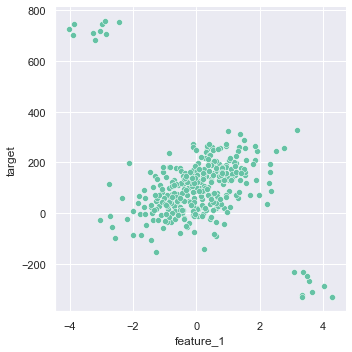

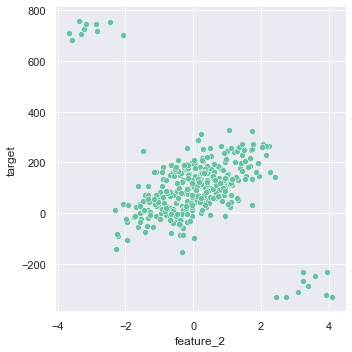

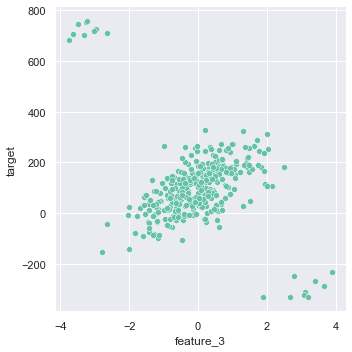

In [32]:
sns.relplot(data=train, x="feature_1", y="target")
sns.relplot(data=train, x="feature_2", y="target")
sns.relplot(data=train, x="feature_3", y="target")

**Вывод:** Выбросы есть(по каждой переменной), они сдвинут коэффициенты на себя и на основной массе данных предсказания будут неточными.

**2.** Обучите простую линейную регрессию и посчитайте качество на тестовой выборке по метрике [MSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error). Что можно сказать о качестве нашей модели?

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linear = LinearRegression()
linear.fit(train_X, train_y)

test, test_X, test_y = load_from_file('test.csv')
print("MSE: ", mean_squared_error(test_y, linear.predict(test_X)))

MSE:  20701.453142635546


Из-за выбросов MSE большой:(

**3.** Теперь обучите линейную регресcию Хьюбера и посчитайте качество на тестовой части по метрикe MSE. Что изменилось? 

In [34]:
huber = HuberRegression()
huber.fit(train_X, train_y)
print(huber.coefs_)

test, test_X, test_y = load_from_file('test.csv')
print("MSE: ", mean_squared_error(test_y, huber.predict(test_X)))

[45.61165624 54.58083956 59.23923309 99.88527169]
MSE:  64169.605666695956


MSE стал больше, поскольку
- мы не минимизировали MSE
- мы не оптимизировали гиперпараметры

**4.** Используя поиск по сетке, подберите оптимальное значение гиперпараметра $c$ нашей модели. Какую метрику стоит использовать? Почему?

**Исправлено - теперь MAE, потому что наша цель - обучить модель под основной датасет, а не выбросы.**

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.pipeline import Pipeline

settings = [
    (HuberRegression, {'regr__fit_intercept': [False, True],
                       'regr__c': np.logspace(0, 4, 30),
                       "regr__lr": np.logspace(-5, 0, 30),
                        "regr__max_iter": [1000]}),
    (LinearRegression, {'regr__fit_intercept': [False, True]})
]

best_estimators = []

for model_class, dct in settings:
    ss = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)
    gs = GridSearchCV(
        estimator = Pipeline([("regr", model_class())]),
        param_grid=dct,
        scoring='neg_mean_absolute_error',
        n_jobs=-1,
        cv=ss,
        error_score='raise'
    )
    gs.fit(train_X, train_y)
    best_estimators += [(model_class.__name__, gs.best_estimator_)]
    print(model_class.__name__, "is ready")

HuberRegression is ready
LinearRegression is ready


**Исправлено - Huber лучше обычной регрессии.**\
Посмотрим на результат, MAE заметно уменьшился по сравнению с linear.

In [42]:
from sklearn.metrics import mean_absolute_error

for model_class, model in best_estimators:
    print(f"Model name: {model_class}")
    print(f"params: {[(x, y) for x, y in model.get_params().items() if x.startswith('regr__')]}")
    print(f"MAE score: {mean_absolute_error(test_y, model.predict(test_X))}")
    print()

Model name: HuberRegression
params: [('regr__c', 1.3738237958832629), ('regr__fit_intercept', True), ('regr__lr', 0.002592943797404667), ('regr__max_iter', 1000)]
MAE score: 65.47974521319215

Model name: LinearRegression
params: [('regr__copy_X', True), ('regr__fit_intercept', True), ('regr__n_jobs', None), ('regr__normalize', 'deprecated'), ('regr__positive', False)]
MAE score: 112.36151170276119



**5.** Для обучающей выборки постройте два графика (по графику на каждую модель), на которых изобразите зависимость истинного и предсказанного значения таргета от каждого признака. Что можно заметить на этих графиках?

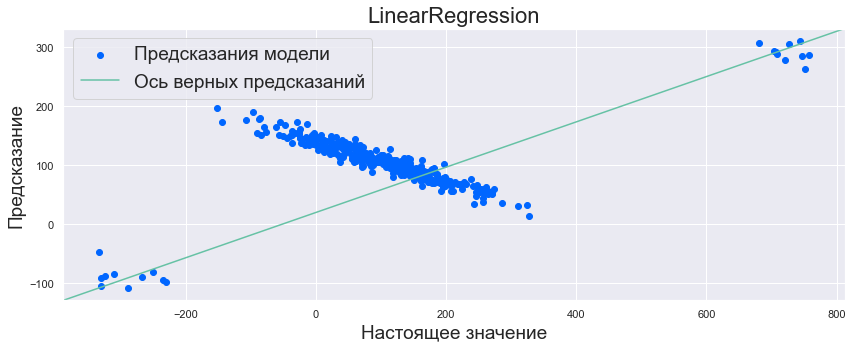

In [38]:
def linear_predictor(model, X, y):

    plt.figure(figsize=(14, 5))
    
    ax = plt.axes()
    ax.scatter(y, model.predict(X), color='#0066FF', label='Предсказания модели')
    ax.plot([0,1],[0,1], transform=ax.transAxes, label='Ось верных предсказаний')
    
    plt.xlabel('Настоящее значение', fontsize=19)
    plt.ylabel('Предсказание', fontsize=19)
    plt.title(model.__class__.__name__, fontsize=22)
    plt.legend(fontsize=19)
    plt.show()
    
linear_predictor(linear, train_X, train_y)

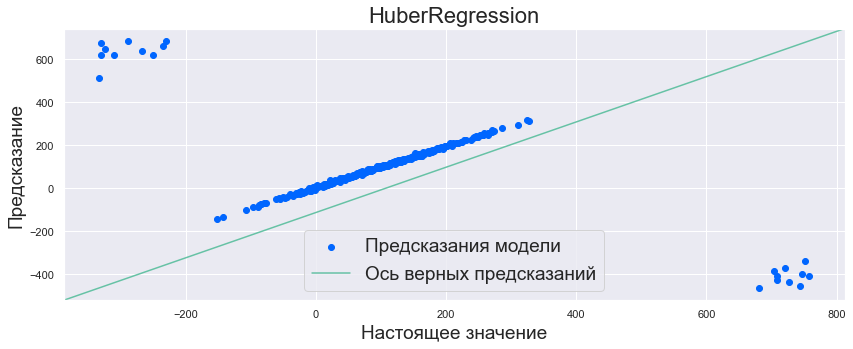

In [200]:
linear_predictor(huber, train_X, train_y)

**Интерпретируем графики:** чем ближе точка лежит к оси y=x, тем ближе предсказание к верному. В linear-regression только предсказания на выбросах близки к верным, в huber - наоборот. 

**Вывод:** Изменённая метрика в huber-regression делает малые штрафы за несоответствие данным из выбросов, поэтому предсказания на основном датаасете близки к верным. С другой строны, метрика в линейной регрессии не подстраивается под выбросы, поэтому "оптимальным" решением она видит подстраивание модели под выбросы, а значит неугадывает в большинстве случаев.

Поэтому, конечно, перед выбором модели стоит исследовать данные (в этом случае на наличие выбросов).